In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
# score для графиков
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [3]:
train = pd.read_csv('~/Desktop/train.csv')
test = pd.read_csv('~/Desktop/test.csv')

# I часть. Стандартизация и нормализация train и test.

In [4]:
train_target = train.Price
train_data = train.drop('Price', axis = 1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
print(train_data.shape)
print(test.shape)

(10000, 19)
(5000, 19)


In [7]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


### Анализируем целевую переменную

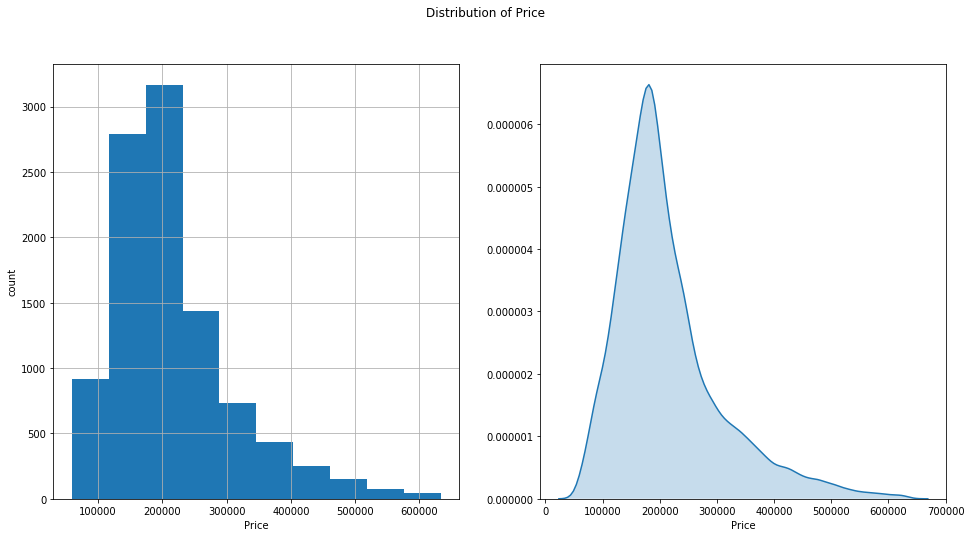

In [12]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [13]:
target_mean = round(train['Price'].mean(), 2)
target_median = train['Price'].median()
target_mode = train['Price'].mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

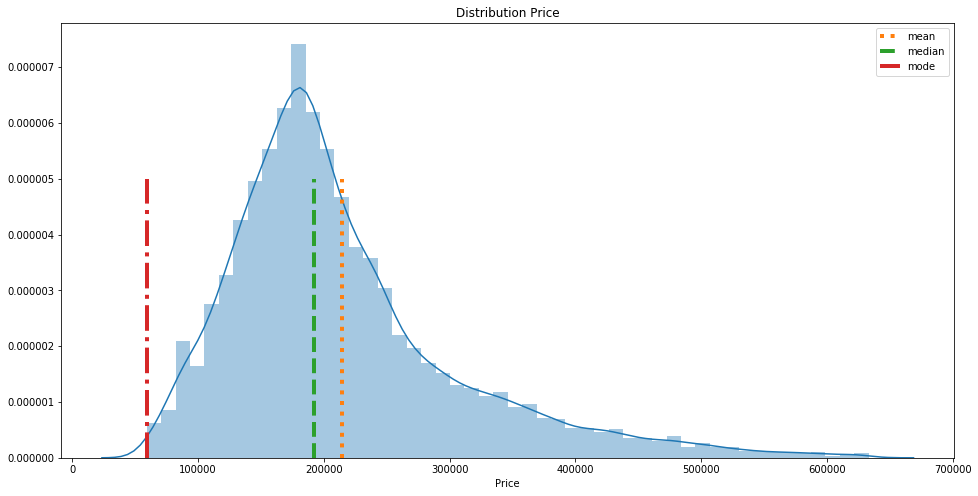

In [14]:
plt.figure(figsize = (16, 8))

sns.distplot(train['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution Price')
plt.legend()
plt.show()

### Проверяем количесто пропущенных значений

In [15]:
train_data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [16]:
test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

# Перед тем как заполнять пустые значения: средним, медианой, модой, нужно убрать возможные выбросы, чтобы не портили значения.

### ROOMS

In [17]:
train_data['Rooms'].value_counts().head()

2.0    3880
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [18]:
test['Rooms'].value_counts().head()

2.0    2030
1.0    1769
3.0    1099
4.0      90
5.0       7
Name: Rooms, dtype: int64

In [19]:
# заполним median, выводит такое же значение как и mode.
train_data.loc[train_data['Rooms']<1.0, 'Rooms'] = train_data['Rooms'].median()
test.loc[test['Rooms']<1.0, 'Rooms'] = train_data['Rooms'].median()
# train_data[train_data['Rooms']<1.0]

In [20]:
train_data.loc[train_data['Rooms']>5.0, 'Rooms'] = train_data['Rooms'].mode()[0]
test.loc[test['Rooms']>5.0, 'Rooms'] = train_data['Rooms'].mode()[0]
# train_data[train_data['Rooms']>5.0]

### Редактируем все значения LifeSquare больше 300 и меньше 10 кв.м.

In [21]:
for i in test.loc[test['LifeSquare']>300]['Rooms']:
    test.loc[(test['LifeSquare']>300)&(test['Rooms']==i), 'LifeSquare'] = train_data[train_data['Rooms']==i]['LifeSquare'].mean()

In [22]:
for i in train_data.loc[train_data['LifeSquare']>300]['Rooms']:
    train_data.loc[(train_data['LifeSquare']>300)&(train_data['Rooms']==i), 'LifeSquare'] = train_data[train_data['Rooms']==i]['LifeSquare'].mean()

In [23]:
# Проверка остались ли еще такие значения в test.
test.loc[test['LifeSquare']>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [24]:
# Проверка остались ли еще такие значения в train.
train_data.loc[train_data['LifeSquare']>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [25]:
for i in test.loc[test['LifeSquare']<10]['Rooms']:
    test.loc[(test['LifeSquare']<10)&(test['Rooms']==i), 'LifeSquare'] = train_data[train_data['Rooms']==i]['LifeSquare'].mean()

In [26]:
for i in train_data.loc[train_data['LifeSquare']<10]['Rooms']:
    train_data.loc[(train_data['LifeSquare']<10)&(train_data['Rooms']==i), 'LifeSquare'] = train_data[train_data['Rooms']==i]['LifeSquare'].mean()

### Редактируем все значения Square больше 300 и меньше 15 кв.м.

In [27]:
for i in test.loc[test['Square']>300]['Rooms']:
    test.loc[(test['Square']>300)&(test['Rooms']==i), 'Square'] = train_data[train_data['Rooms']==i]['Square'].mean()

In [28]:
for i in train_data.loc[train_data['Square']>300]['Rooms']:
    train_data.loc[(train_data['Square']>300)&(train_data['Rooms']==i), 'Square'] = train_data[train_data['Rooms']==i]['Square'].mean()

In [29]:
# заполнить средними по количеству комнат
train_data.loc[train_data['Square']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B
1316,11526,27,1.0,4.633498,25.022651,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
1608,10202,6,1.0,2.596351,25.022651,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B
3413,9487,5,1.0,5.129222,25.022651,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B
4853,3224,27,2.0,2.377248,35.861494,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
4900,4504,27,3.0,4.390331,50.690873,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B
6392,14786,1,1.0,1.136859,25.022651,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
8283,15744,34,1.0,1.988943,25.022651,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B


In [30]:
for i in test.loc[test['Square']<10]['Rooms']:
    test.loc[(test['Square']<10)&(test['Rooms']==i), 'Square'] = train_data[train_data['Rooms']==i]['Square'].mean()

In [31]:
for i in train_data.loc[train_data['Square']<10]['Rooms']:
    train_data.loc[(train_data['Square']<10)&(train_data['Rooms']==i), 'Square'] = train_data[train_data['Rooms']==i]['Square'].mean()

### KitchenSquare меньше 1 кв.м.

In [32]:
for i in test.loc[test['KitchenSquare']<1]['Rooms']:
    test.loc[(test['KitchenSquare']<1)&(test['Rooms']==i), 'KitchenSquare'] = train_data[train_data['Rooms']==i]['KitchenSquare'].median()

In [33]:
for i in train_data.loc[train_data['KitchenSquare']<1]['Rooms']:
    train_data.loc[(train_data['KitchenSquare']<1)&(train_data['Rooms']==i), 'KitchenSquare'] = train_data[train_data['Rooms']==i]['KitchenSquare'].median()

### HouseYear

In [34]:
# заменить на моду
train_data.loc[train_data['HouseYear']>2020, 'HouseYear'] = train_data['HouseYear'].mode()[0]
test.loc[test['HouseYear']>2020, 'HouseYear'] = train_data['HouseYear'].mode()[0]
train_data[train_data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


### Заполняем пропущенные строки LifeSquare -  размером LifeSquare относительно к площади.

In [35]:
train_data['LifeSquare'].isnull().value_counts()

False    7887
True     2113
Name: LifeSquare, dtype: int64

In [36]:
test['LifeSquare'].isnull().value_counts()

False    3959
True     1041
Name: LifeSquare, dtype: int64

In [37]:
# заполняем проупщенные строки LifeSquare средним значением по количеству комнат в квартире
for i in test.loc[test['LifeSquare'].isnull()]['Rooms']:
    test.loc[(test['LifeSquare'].isnull())&(test['Rooms']==i), 'LifeSquare'] = train_data[train_data['Rooms']==i]['LifeSquare'].mean()

In [38]:
for i in train_data.loc[train_data['LifeSquare'].isnull()]['Rooms']:
    train_data.loc[(train_data['LifeSquare'].isnull())&(train_data['Rooms']==i), 'LifeSquare'] = train_data[train_data['Rooms']==i]['LifeSquare'].mean()

### Заполняем пропущенные строки Healthcare_1

### Делаем модель RandomForestClassifier для заполнения

In [39]:
train_data_2 = train_data.drop(train_data.select_dtypes(include='object'), axis=1)
test_2 = test.drop(test.select_dtypes(include='object'), axis=1)

In [40]:
# выбираем весь Healthcare_1 кроме Nan
train_data_2 = train_data.loc[train_data_2.Healthcare_1.notnull()]

In [41]:
test_2 = test.loc[test_2.Healthcare_1.notnull()]

In [42]:
features_train = train_data_2[['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Healthcare_1']]
features_test = test_2[['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Healthcare_1']]

In [43]:
# целевая переменная train
target_data_2 = features_train['Healthcare_1']

In [44]:
# целевая переменная test
target_test_2 = features_test['Healthcare_1']

In [45]:
train_data_2 = features_train.drop(['Healthcare_1'], axis=1)
test_2 = features_test.drop(['Healthcare_1'], axis=1)

### Учим модель на train_data_2 и target_data_2

In [46]:
rf_model_2 = RandomForestClassifier(max_depth=14, random_state = 19)

In [47]:
rf_model_2.fit(train_data_2, target_data_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=19, verbose=0,
                       warm_start=False)

In [48]:
test_2_pred = rf_model_2.predict(test_2)

In [49]:
# отличный результат, есть взаимосвязь, можно заполнять данными из модели
accuracy_score(target_test_2, test_2_pred)

1.0

In [50]:
# полный вывод, чтобы видеть количество строк
train_null = train_data.loc[train_data.Healthcare_1.isnull()]
train_null = train_null[['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2']]
train_null

,DistrictId,Social_1,Social_2,Social_3,Helthcare_2
0,35,33,7976,5,0
6,154,20,4386,14,1
7,74,6,1437,3,0
8,1,1,264,0,0
9,23,6,1437,3,0
...,...,...,...,...,...
9992,150,52,10311,6,1
9993,13,74,19083,2,5
9994,23,6,1437,3,0
9996,18,30,5562,0,0


In [51]:
# полный вывод, чтобы видеть количество строк
test_null = test.loc[test.Healthcare_1.isnull()]
test_null = test_null[['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2']]
test_null

,DistrictId,Social_1,Social_2,Social_3,Helthcare_2
0,58,11,2748,1,0
1,74,6,1437,3,0
3,47,23,4583,3,3
4,27,2,629,1,0
6,23,6,1437,3,0
...,...,...,...,...,...
4992,96,53,14892,4,1
4995,11,36,5992,0,1
4996,1,1,264,0,0
4997,12,74,19083,2,5


In [52]:
healthcare_1_pred_train = rf_model_2.predict(train_null)

In [53]:
train_data.loc[train_data['Healthcare_1'].isna(), 'Healthcare_1'] = healthcare_1_pred_train

In [54]:
# проверка
train_data.loc[train_data.Healthcare_1.isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [55]:
healthcare_1_pred_test = rf_model_2.predict(test_null)

In [56]:
test.loc[test['Healthcare_1'].isna(), 'Healthcare_1'] = healthcare_1_pred_test

In [57]:
# проверка
test.loc[test.Healthcare_1.isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


### Проверка, остались ли незаполненные строки

In [58]:
print('train_data')
print(train_data.isnull().sum())
print('-------------------')
print('test')
print(test.isnull().sum())

train_data
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64
-------------------
test
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64


### Было выявлено, что в 485 строках жилая площадь больше самой площади квартиры, поэтому значения заменены.

In [59]:
train_data[train_data['Square']<train_data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,0.0,0,0,B
44,10521,38,3.0,104.211396,106.340403,7.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B
52,2301,1,2.0,61.400054,65.224603,6.0,17,22.0,2016,0.007122,B,B,1,264,0,540.0,0,1,B
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,1970.0,1,11,B
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,35.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,0.0,0,0,B
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,0.0,0,0,B
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B


In [60]:
train_data.loc[train_data['Square'] < train_data['LifeSquare'], 'LifeSquare'] = train_data.loc[train_data['Square'] < train_data['LifeSquare'], 'Square']/(train_data['Square']/train_data['LifeSquare']).mean()
test.loc[test['Square'] < test['LifeSquare'], 'LifeSquare'] = test.loc[test['Square'] < test['LifeSquare'], 'Square']/(test['Square']/test['LifeSquare']).mean()

### Проверка train

In [61]:
train_data[train_data['Square']<train_data['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


### Проверка test

In [62]:
test[test['Square']<test['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


### Перевод 'object' в dummie значения.

In [63]:
train_objects = train_data.select_dtypes(include='object')
test_objects = test.select_dtypes(include='object')

In [64]:
train_objects = pd.get_dummies(train_objects)
test_objects = pd.get_dummies(test_objects)

In [65]:
train_data = train_data.drop(train_data.select_dtypes(include='object'), axis=1)
test = test.drop(test.select_dtypes(include='object'), axis=1)

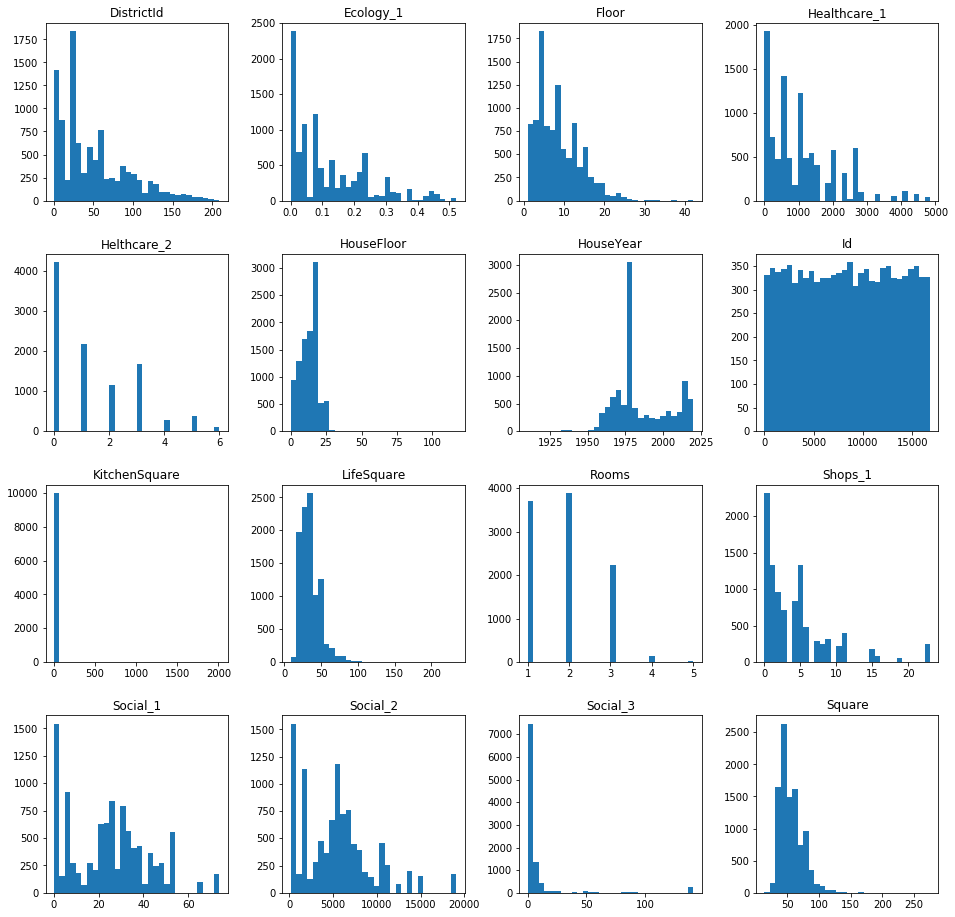

In [73]:
train_data.hist(figsize=(16,16), bins=30, grid=False);

### Стандартизация с помощью StandardScaler из библиотеки Sklearn.preprocessing

In [74]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

In [75]:
train_data_scaled = pd.concat([train_data_scaled, train_objects], axis=1)
test_scaled = pd.concat([test_scaled, test_objects], axis=1)

In [76]:
train_d = pd.concat([train_data, train_target], axis=1)
train_d_sc = pd.concat([train_data_scaled, train_target], axis=1)

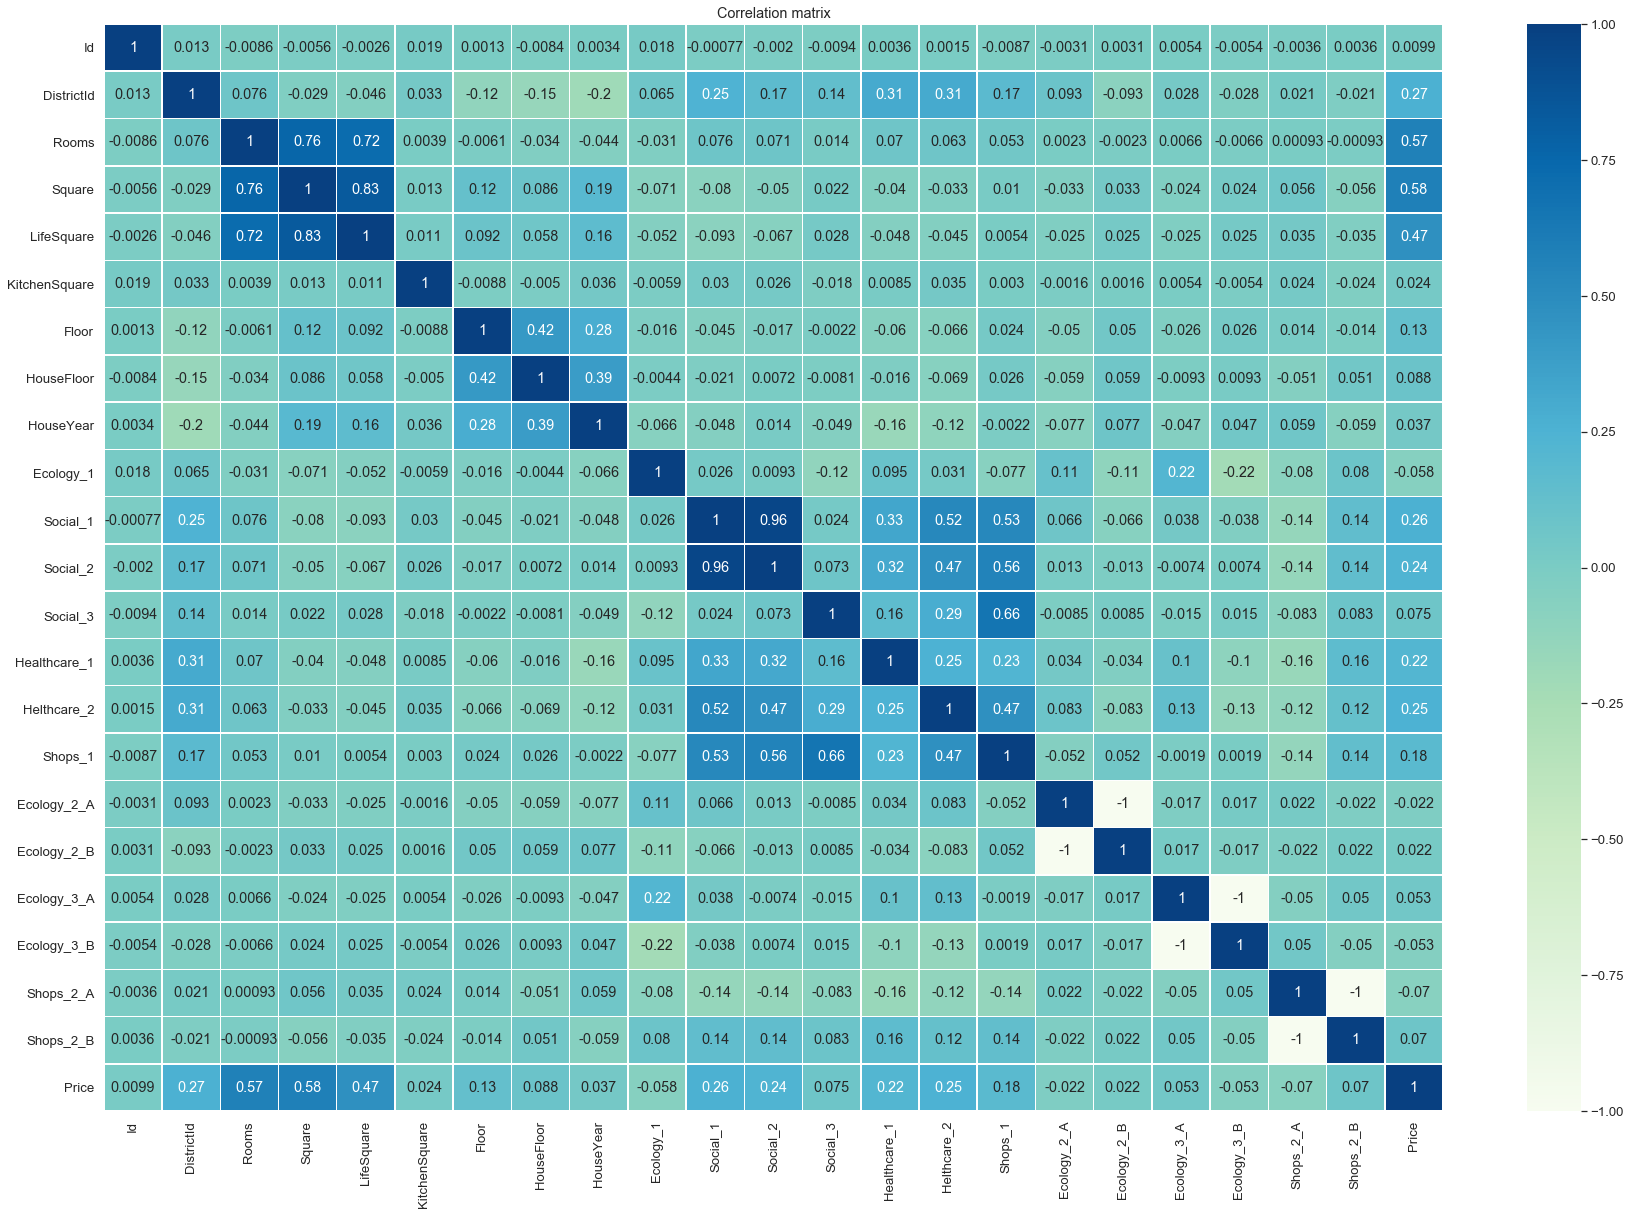

In [77]:
# на scaled значения
plt.figure(figsize = (30,20))

sns.set(font_scale=1.2)
sns.heatmap(train_d_sc.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [78]:
train_data_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.198863e-17,2.241762e-16,-1.626033e-16,3.394618e-16,-7.540635e-17,-2.094477e-16,-1.426914e-16,1.001077e-15,-4.696743e-15,5.593304e-17,...,-8.172851e-16,-2.474909e-16,-1.040990e-15,-1.531331e-16,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,-1.725416e+00,-1.156369e+00,-1.095417e+00,-2.225336e+00,-1.874196e+00,-2.001691e-01,-1.436150e+00,-1.860992e+00,-4.066683e+00,-9.986406e-01,...,-3.373466e-01,-1.073512e+00,-8.834798e-01,-8.804019e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.672776e-01,-6.974994e-01,-1.095417e+00,-7.571585e-01,-6.906934e-01,-9.493694e-02,-8.637280e-01,-5.327028e-01,-5.901334e-01,-8.503701e-01,...,-3.373466e-01,-8.274340e-01,-8.834798e-01,-6.723330e-01,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,2.282941e-03,-3.304041e-01,1.376053e-01,-1.932689e-01,-1.607175e-01,-2.478217e-02,-2.913057e-01,5.764773e-02,-4.271701e-01,-3.649310e-01,...,-2.534212e-01,-2.532521e-01,-2.139233e-01,-2.561952e-01,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,8.662865e-01,5.643907e-01,1.376053e-01,5.072652e-01,5.375174e-01,8.044998e-02,6.627314e-01,6.479983e-01,8.765358e-01,6.463114e-01,...,-1.275331e-01,5.126656e-01,4.556332e-01,3.680115e-01,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.731834e+00,3.638814e+00,3.836673e+00,1.150654e+01,1.391177e+01,7.041060e+01,6.386954e+00,1.540676e+01,1.908636e+00,3.386085e+00,...,5.579395e+00,3.898288e+00,3.133859e+00,3.905183e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# II часть. Построение модели RandomForestRegressor

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data_scaled, train_target, test_size = 0.20, random_state = 19)

In [80]:
print(f'X_train: ', X_train.shape)
print(f'X_valid: ', X_valid.shape)
print(f'y_train: ', y_train.shape)
print(f'y_valid: ', y_valid.shape)

X_train:  (8000, 22)
X_valid:  (2000, 22)
y_train:  (8000,)
y_valid:  (2000,)


In [68]:
%%time
r2_train = []
r2_valid = []
r2=[]
for i in range(2,30,2):
    rf_model = RandomForestRegressor(max_depth=i, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    pred_train_ = rf_model.predict(X_train)
    pred_test_ = rf_model.predict(X_valid)
    r2_train.append(r2_score(y_train, pred_train_))
    r2_valid.append(r2_score(y_valid,pred_test_))
    r2.append(i)
    r2.append(r2_score(y_valid,pred_test_))


Wall time: 11.3 s


In [69]:
max(r2_valid)

0.7493540634099838

In [70]:
# смотрим результат по max_depth
r2

[2,
 0.47968428439759203,
 4,
 0.5993090629764721,
 6,
 0.6810020030553775,
 8,
 0.7202857349415335,
 10,
 0.7369997816523242,
 12,
 0.74263053123874,
 14,
 0.7446790732048884,
 16,
 0.7472083997193637,
 18,
 0.744557177108264,
 20,
 0.7409240161572975,
 22,
 0.7471312855634591,
 24,
 0.7425788687740483,
 26,
 0.7449993354545332,
 28,
 0.7493540634099838]

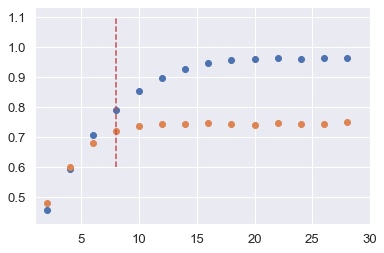

In [71]:
plt.scatter(list(range(2,30,2)), r2_train)
plt.scatter(list(range(2,30,2)), r2_valid)
plt.plot([8]*10, np.linspace(0.6, 1.1, 10), '--', c = 'r')
plt.xlim(1,30)
plt.grid(1)

In [126]:
randforest_model = RandomForestRegressor(max_depth=26)

In [127]:
randforest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=26, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## RandomForestRegressor

R2:	0.961
MAE:	10641.455
MSE:	333102155.353


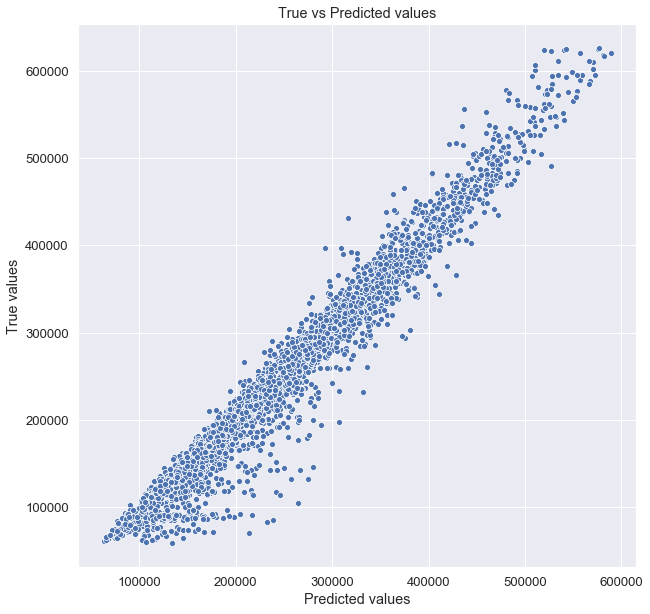

In [128]:
y_train_preds = randforest_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.749
MAE:	27944.08
MSE:	2204646672.75


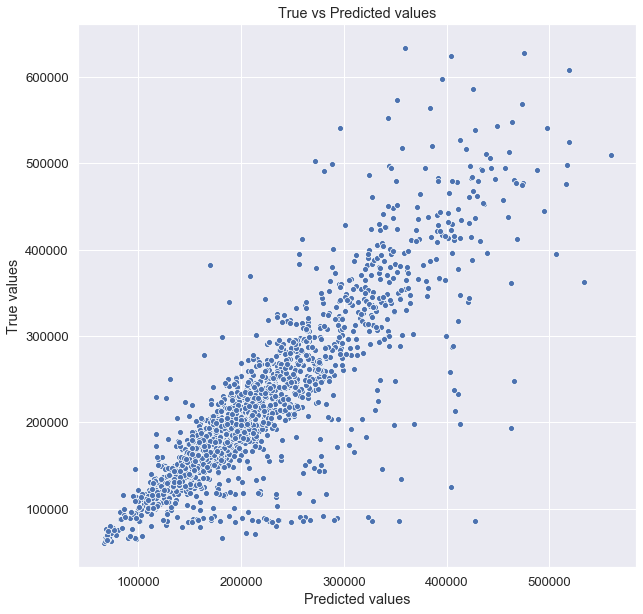

In [129]:
y_train_preds = randforest_model.predict(X_valid)
evaluate_preds(y_valid.values.flatten(), y_train_preds.flatten())

In [76]:
feature_importances = pd.DataFrame()
feature_importances['importance'] = randforest_model.feature_importances_
feature_importances['feature_name'] = X_train.columns.tolist()
feature_importances.sort_values(by='importance', ascending=False)

,importance,feature_name
3,0.385257,Square
10,0.095634,Social_1
11,0.091720,Social_2
2,0.073022,Rooms
12,0.054070,Social_3
1,0.043062,DistrictId
9,0.037187,Ecology_1
8,0.034551,HouseYear
13,0.033619,Healthcare_1
4,0.029745,LifeSquare


# Сохранение randforest_model и scaler

In [77]:
'''with open('MODEL751.pkl', 'wb') as file:
    pickle.dump(randforest_model, file)'''

"with open('MODEL751.pkl', 'wb') as file:\n    pickle.dump(randforest_model, file)"

In [78]:
'''with open('SCALER751.pkl', 'wb') as file:
    pickle.dump(randforest_model, file)'''

"with open('SCALER751.pkl', 'wb') as file:\n    pickle.dump(randforest_model, file)"

# Загрузка

In [79]:
'''with open('MODEL751.pkl', 'rb') as file:
    model_load=pickle.load(file)'''

"with open('MODEL751.pkl', 'rb') as file:\n    model_load=pickle.load(file)"

# Предсказание по сохраненной модели

In [80]:
# y_pred1 = model_load.predict(X_valid)

In [81]:
# r2(y_valid, y_pred1)

# 2 МОДЕЛЬ обученная на всем датасете

In [130]:
train_data_scaled.shape

(10000, 22)

In [131]:
train_target.shape

(10000,)

In [132]:
randforest_model2 = RandomForestRegressor(max_depth=26) # поменять

In [133]:
randforest_model2.fit(train_data_scaled, train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=26, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Тест для Kaggle 2 МОДЕЛЬ

In [134]:
y_submission2 = randforest_model2.predict(test_scaled)
#y_submission

In [135]:
y2 = pd.DataFrame({'Id': test['Id'],
                  'Price': y_submission2.flatten()})
y2['Id'].value_counts()

1066     1
12995    1
15030    1
6010     1
4795     1
        ..
7485     1
9534     1
5440     1
7489     1
16384    1
Name: Id, Length: 5000, dtype: int64

In [136]:
y2.describe()

,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,215289.222615
std,4832.674037,79013.348260
min,1.000000,65565.965543
25%,4221.750000,164034.540464
50%,8320.500000,196631.005616
75%,12598.250000,249589.643743
max,16795.000000,574053.746242


In [137]:
y2.to_csv('submission.csv', index=False)